In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the stock data and examine some sample records
stock_data = pd.read_csv('../data/raw/AAPL_stock_data.csv', index_col='Date', parse_dates=True)
stock_data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-01-02,42.540001,43.075001,42.314999,43.064999,40.568920,102223600
2018-01-03,43.132500,43.637501,42.990002,43.057499,40.561859,118071600
2018-01-04,43.134998,43.367500,43.020000,43.257500,40.750263,89738400
2018-01-05,43.360001,43.842499,43.262501,43.750000,41.214230,94640000
2018-01-08,43.587502,43.902500,43.482498,43.587502,41.061150,82271200


The data reflects daily stock price fluctuations, including open, close, and trading volume for Apple Inc.

In [3]:
# Check basic information about the data
stock_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1259 entries, 2018-01-02 to 2022-12-30
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       1259 non-null   float64
 1   High       1259 non-null   float64
 2   Low        1259 non-null   float64
 3   Close      1259 non-null   float64
 4   Adj Close  1259 non-null   float64
 5   Volume     1259 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 68.9 KB


### Data Overview

- The dataset contain **1,259 entries** from January 2, 2018 to **December 30, 2022**, with six columns: `Open`, `High`, `Low`, `Close`, `Adj Close` and `Volume`.
- All columns have valid non-null values, indicating no missing data.
- The data types are primarily `float64` for stock price columns and `int64` for `Volume`.

In [4]:
# Get summary statistics
stock_data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1259.000000,1259.000000,1259.000000,1259.000000,1259.000000,1.259000e+03
mean,98.028503,99.217804,96.881497,98.092897,95.913522,1.168806e+08
std,46.302471,46.894754,45.688159,46.309891,46.240692,5.504461e+07
min,35.994999,36.430000,35.500000,35.547501,33.989891,3.519590e+07
25%,50.956249,51.448750,50.573750,51.022501,49.046965,8.014245e+07
50%,91.279999,92.970001,90.910004,91.632500,89.386223,1.023002e+08
75%,142.760002,144.474998,141.004997,142.864998,140.842392,1.372052e+08
max,182.630005,182.940002,179.119995,182.009995,179.273590,4.265100e+08


- The average closing price is **$98.09**, with a standard deviation of **$46.31**.
- The highest closing price recorded during this period is **$182.01**, while the lowest is **$35.55**.
- The dataset's median (50% quantile) is **$91.63**, indicating that stock prices were clustered in the mid-$90 range during this time frame.
- Volume shows significant variation, with a mean of **116.88 million** shares traded daily, peaking at **426.51 million**.

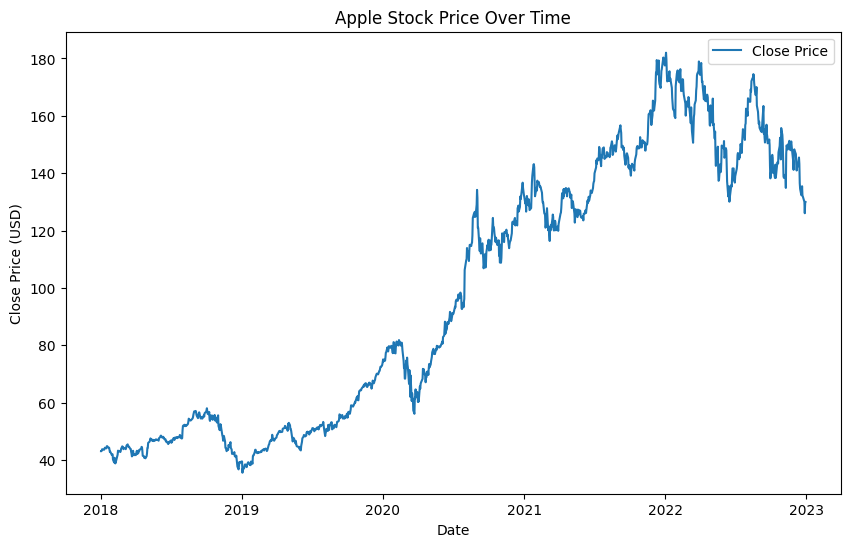

In [5]:
# Plot closing prices over time
plt.figure(figsize=(10, 6))
plt.plot(stock_data['Close'], label='Close Price')
plt.title('Apple Stock Price Over Time')
plt.xlabel('Date')
plt.ylabel('Close Price (USD)')
plt.legend()
plt.savefig('../plots/apple_stock_price_over_time.png')
plt.show()

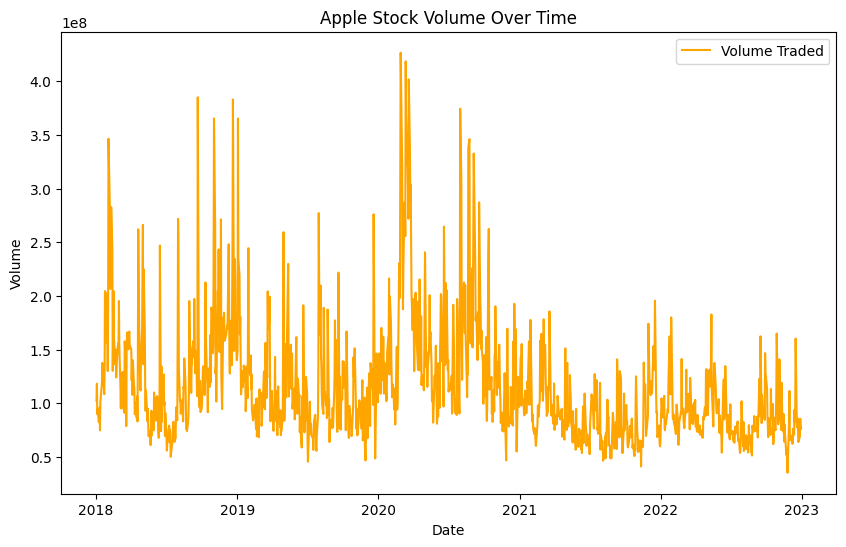

In [6]:
# Plot volume traded over time
plt.figure(figsize=(10, 6))
plt.plot(stock_data['Volume'], label='Volume Traded', color='orange')
plt.title('Apple Stock Volume Over Time')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.legend()
plt.savefig('../plots/volume_traded_over_time.png')
plt.show()

In [7]:
# Calculate moving averages
stock_data['SMA_50'] = stock_data['Close'].rolling(window=50).mean()  # 50-day SMA
stock_data['SMA_200'] = stock_data['Close'].rolling(window=200).mean()  # 200-day SMA

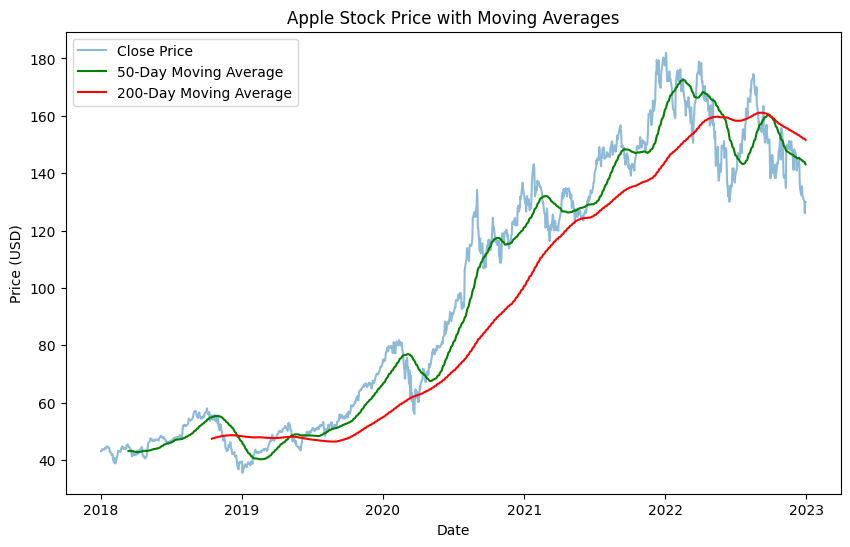

In [8]:
plt.figure(figsize=(10, 6))
plt.plot(stock_data['Close'], label='Close Price', alpha=0.5)
plt.plot(stock_data['SMA_50'], label='50-Day Moving Average', color='green')
plt.plot(stock_data['SMA_200'], label='200-Day Moving Average', color='red')
plt.title('Apple Stock Price with Moving Averages')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.savefig('../plots/volume_traded_over_time.png')
plt.show()

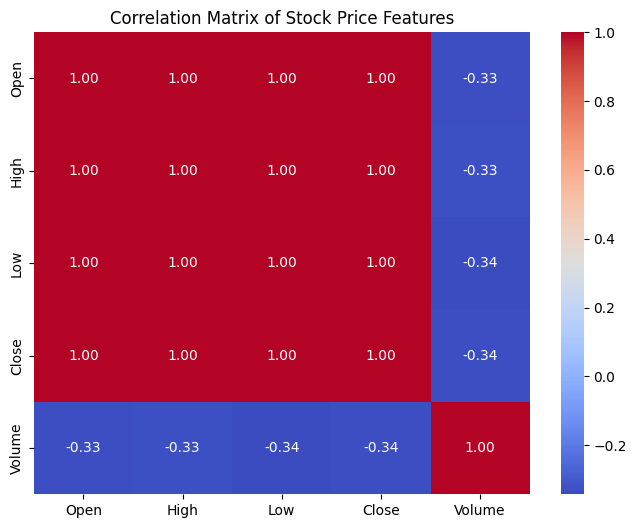

In [9]:
# Correlation matrix
plt.figure(figsize=(8, 6))
corr_matrix = stock_data[['Open', 'High', 'Low', 'Close', 'Volume']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Stock Price Features')
plt.savefig('../plots/correlation_matrix.png')
plt.show()

In [11]:
corr_matrix

,Open,High,Low,Close,Volume
Open,1.000000,0.999722,0.999648,0.999249,-0.333692
High,0.999722,1.000000,0.999601,0.999648,-0.327112
Low,0.999648,0.999601,1.000000,0.999660,-0.342436
Close,0.999249,0.999648,0.999660,1.000000,-0.335218
Volume,-0.333692,-0.327112,-0.342436,-0.335218,1.000000


- There is a strong positive correlation between `Open`, `High`, `Low`, and `Close` prices (all values are close to 1.00), suggesting that these variables move together closely in time.
- The Volume has a negative correlation with price features (around -0.33), indicating a slight inverse relationship between the amount of shares traded and the stock price.

### Conclusion

- **No missing data:** All data points are complete, simplifying preprocessing steps.
- **Strong correlation between stock price features:** Open, High, Low, and Close are tightly linked, meaning changes in one are closely followed by changes in the others.
- **Volume’s inverse correlation with price:** The slight negative correlation between Volume and stock prices could indicate that higher trading volumes tend to accompany price drops or periods of volatility.